In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset

In [2]:
dataset_names = ["ag_news", "sogou_news", "fancyzhx/dbpedia_14", "yelp_polarity", "yelp_review_full", "yahoo_answers_topics", "amazon_polarity"]
datasets = [load_dataset(name) for name in dataset_names]

In [3]:
label_distributions = {}

for dataset_name, dataset in zip(dataset_names, datasets):
    try:
        train_labels = dataset["train"]["label"]
        test_labels = dataset["test"]["label"]
    except KeyError:
        train_labels = dataset["train"]["topic"]
        test_labels = dataset["test"]["topic"]
    all_labels = np.concatenate((train_labels, test_labels))
    label_counts = np.unique(all_labels, return_counts=True)
    if dataset_name == "fancyzhx/dbpedia_14":
        dataset_name = "dbpedia"
    label_distributions[dataset_name] = label_counts

In [4]:
column_names = ['label', 'title', 'content']
amazon_full_train = pd.read_csv('train.csv', header=None, names=column_names)
amazon_full_test = pd.read_csv('test.csv', header=None, names=column_names)
train_labels = amazon_full_train['label'].tolist()
test_labels = amazon_full_test['label'].tolist()
all_labels = np.concatenate((train_labels, test_labels))
label_counts = np.unique(all_labels, return_counts=True)
label_distributions["amazon_full"] = label_counts

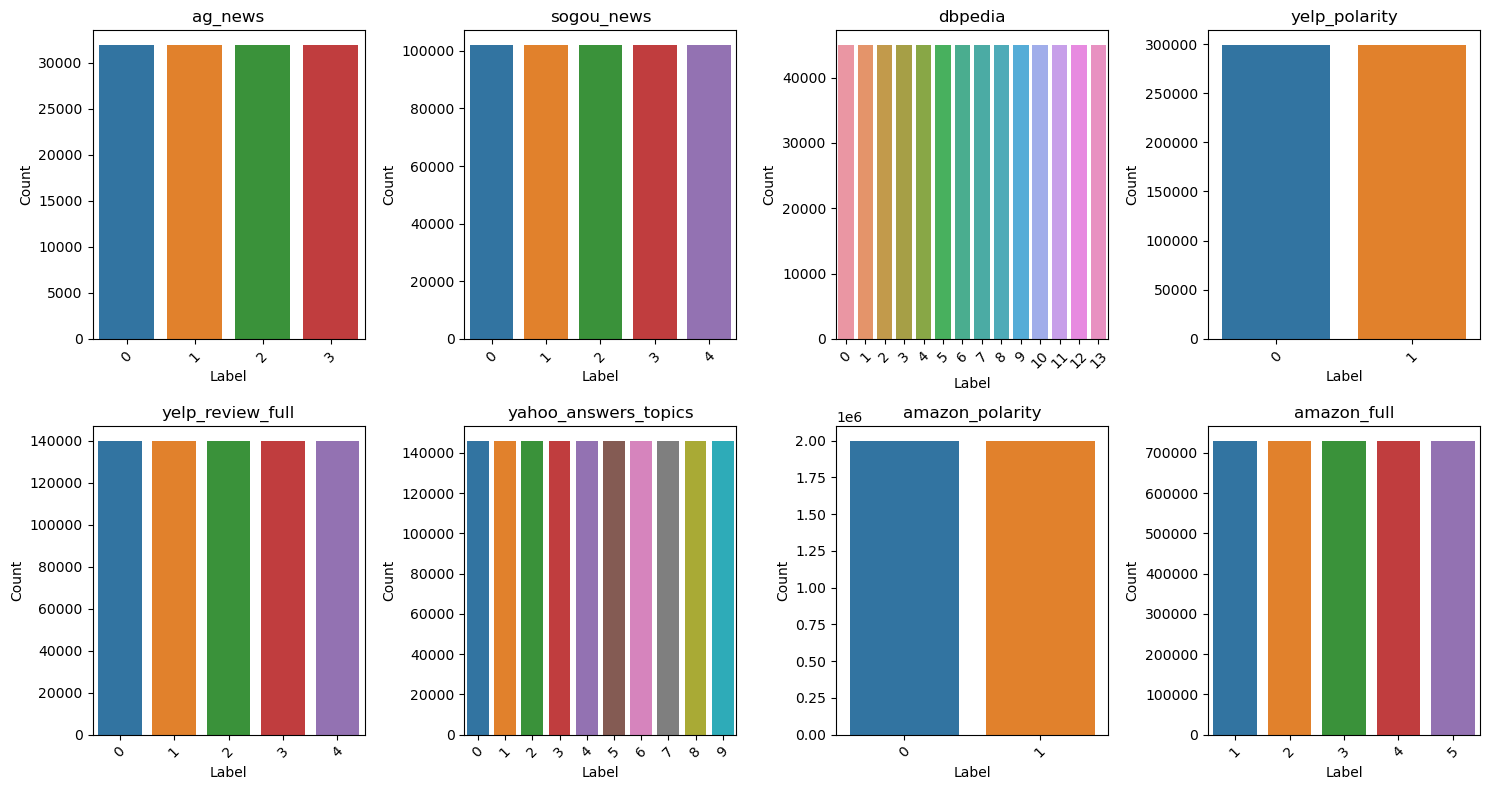

In [5]:
plt.figure(figsize=(15, 8))
for i, dataset_name in enumerate(label_distributions):
    plt.subplot(2, 4, i+1)
    sns.barplot(x=label_distributions[dataset_name][0], y=label_distributions[dataset_name][1])
    plt.title(dataset_name)
    plt.xlabel("Label")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()